In [1]:
# ignore warning message if cannot open file
# used for formatting slides, not needed for notes
try(source("../startup.R"))
options(jupyter.plot_mimetypes="image/png")

# STATS 306: Introduction to Statistical Computing

# Administrative stuff

| Person                  | Uniqname | Office Hours | Location      |
|-------------------------|----------|--------------|---------------|
| Prof. Jonathan Terhorst | jonth    | Tu 2-4pm     | 269 West Hall |
| Byoung Jang             | bwjang   |    TBD       |     SLC       |
| Brad Zhao               | rfzhao   |    TBD       |     SLC       |
| Tim Tu                  | timtu    |    TBD       |     SLC       |


## The book

<img style="float:right; margin: 10px; width: 200px" src="http://r4ds.had.co.nz/cover.png"/>

We will follow the book "R for Data Science" (R4DS) by Hadley Wickham and Garrett Grolemund. The electronic version is available [for free](http://r4ds.had.co.nz). There is no need to purchase the hardcopy version unless you enjoy spending money.

## Accessing an R programming enviroment
Everything in this course will be done using [Jupyter notebooks](http://jupyter.org/) running the [R programming language](https://www.r-project.org/). Lecture notes will be distributed in Jupyter notebook format before lecture. You are encouraged to bring your laptop to lecture and follow along.

### Using J3SO
The easiest way to get up and running in this environment is by surfing to [https://jupyter.stats306.org](https://jupyter.stats306.org). You should have access as long as you are on the Canvas roster. (Waitlisted students will need to e-mail me.)


### RStudio
Another popular option is [RStudio](http://rstudio.org). 

You are free to use whatever environment you please, but lectures and assignments will be done using Jupyter notebook.

## What this course is about
* [Data Visualization](#Data-Visualization)
* [Data Transformation](#Data-Transformation)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Strings](#Strings)
* [Dates and Times](#Dates-and-Times)
* [Functions](#Functions) / abstraction
* [Vectors](#Vectors)
* [Iteration](#Iteration)
* [Models](#Models)

## What this course is *not* about
This is not a traditional programming course. You will learn to program in R as a byproduct of learning how to visualize, clean, and model data. However we will *not* cover things like:
- Algorithms
- Data structures
- OOP
- etc.

If you find that you enjoy programming and want to go further, these would be good topics to learn about in a future course.

# Today's lecture
Today's lecture will be a whirlwind tour of some of the major topics to be covered in this course. Don't worry if you 
don't understand everything. We will cover all of these topics in much more detail later.
## Goals for today's lecture
- Learn how to load the Jupyter notebooks and the R programming environment on your computer.
- Understand the basic building blocks of a data analysis
- Learn about the homework submission system

## The practice of data science
![data science exploration](http://r4ds.had.co.nz/diagrams/data-science-explore.png)

## Tidy data
There are many different ways to represent data in a table, but some are better than others.
We say that a data table is "[tidy](http://vita.had.co.nz/papers/tidy-data.pdf)" if:
- Each row represents an observation.
- Each column represents a variable.
- Each different type of data set gets its own table.

Data tables which are not tidy are called messy!

### A messy data set
Here is an example of a messy data set:

In [2]:
load("messy_tidy.RData")

In [3]:
messy

   religion                <$10k $10-20k $20-30k $30-40k $40-50k $50-75k
1  Agnostic                 27    34       60     81      76      137   
2  Atheist                  12    27       37     52      35       70   
3  Buddhist                 27    21       30     34      33       58   
4  Catholic                418   617      732    670     638     1116   
5  Don’t know/refused       15    14       15     11      10       35   
6  Evangelical Prot        575   869     1064    982     881     1486   
7  Hindu                     1     9        7      9      11       34   
8  Historically Black Prot 228   244      236    238     197      223   
9  Jehovah's Witness        20    27       24     24      21       30   
10 Jewish                   19    19       25     25      30       95   

Note that messy data is sometimes preferable to the tidy representation:
- It can be more compact and readable.
- It can take less space to store.
- It can be easier to enter.

The term "messy" is borrowed from R4DS. It simply means that it is not optimal for analyzing using statistical  software.

### A tidy data set
Here is the same data in tidy form:

In [4]:
head(tidy)

  religion income  freq
1 Agnostic <$10k    27 
2 Agnostic $10-20k  34 
3 Agnostic $20-30k  60 
4 Agnostic $30-40k  81 
5 Agnostic $40-50k  76 
6 Agnostic $50-75k 137 

Compared to the messy version:
- Income, which used to be spread across many columns, is now gathered into the second column.
- Each combination of religion and income category gets its own row. 

### The tidyverse
The R commands used in the book are collectively known as the *tidyverse*. They are called that because they expect tidy data as input, and (where necessary) they return tidy data as output.

All of the code examples will assume that you have loaded this package. The way to load packages in R is by using the ``library()`` command:

In [5]:
# install.packages('tidyverse') if necessary. (Not needed in cloud environments.)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()


## Data Visualization
The humans are much better than computers at recognizing patterns. Consequently, the first step in most data science projects is to visualize the data. Let's examine a standard R dataset called ``mpg`` on the gas mileage for various makes of automobile.

First, the raw data:

In [6]:
print(mpg)

# A tibble: 234 x 11
   manufacturer model   displ  year   cyl trans   drv     cty   hwy fl    class
   <chr>        <chr>   <dbl> <int> <int> <chr>   <chr> <int> <int> <chr> <chr>
 1 audi         a4        1.8  1999     4 auto(l… f        18    29 p     comp…
 2 audi         a4        1.8  1999     4 manual… f        21    29 p     comp…
 3 audi         a4        2    2008     4 manual… f        20    31 p     comp…
 4 audi         a4        2    2008     4 auto(a… f        21    30 p     comp…
 5 audi         a4        2.8  1999     6 auto(l… f        16    26 p     comp…
 6 audi         a4        2.8  1999     6 manual… f        18    26 p     comp…
 7 audi         a4        3.1  2008     6 auto(a… f        18    27 p     comp…
 8 audi         a4 qua…   1.8  1999     4 manual… 4        18    26 p     comp…
 9 audi         a4 qua…   1.8  1999     4 auto(l… 4        16    25 p     comp…
10 audi         a4 qua…   2    2008     4 manual… 4        20    28 p     comp…
# ... with 224 more

As we can see this data frame (actually it is a **tibble**, a newer type of data frame) has 234 observations (rows) and 11 variables (columns). Only the first 10 rows and columns are displayed above.

## Scatter plotting
The city mileage `cty` and highway mileage `hwy` should be correlated. Let us plot them.

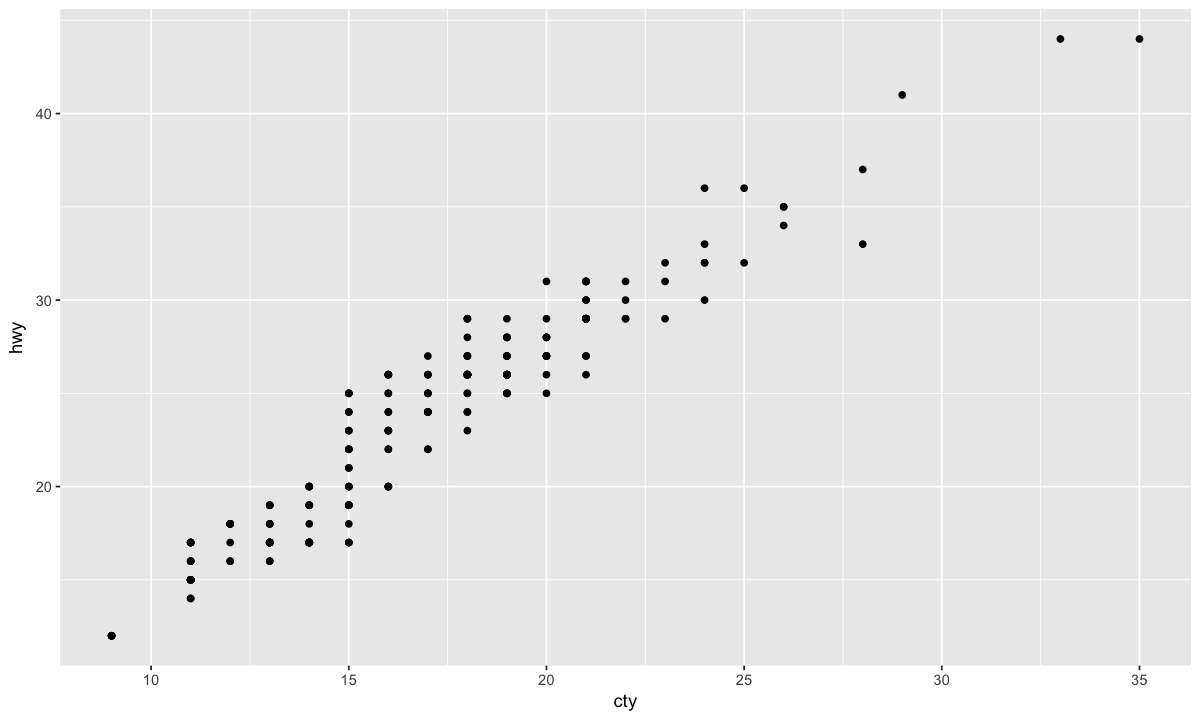

In [7]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = cty, y = hwy))

As expected, cars that tend to have a higher highway mileage also tend to have a higher city mileage. Let us try to use the class of the vehicle as a color in the above plot.

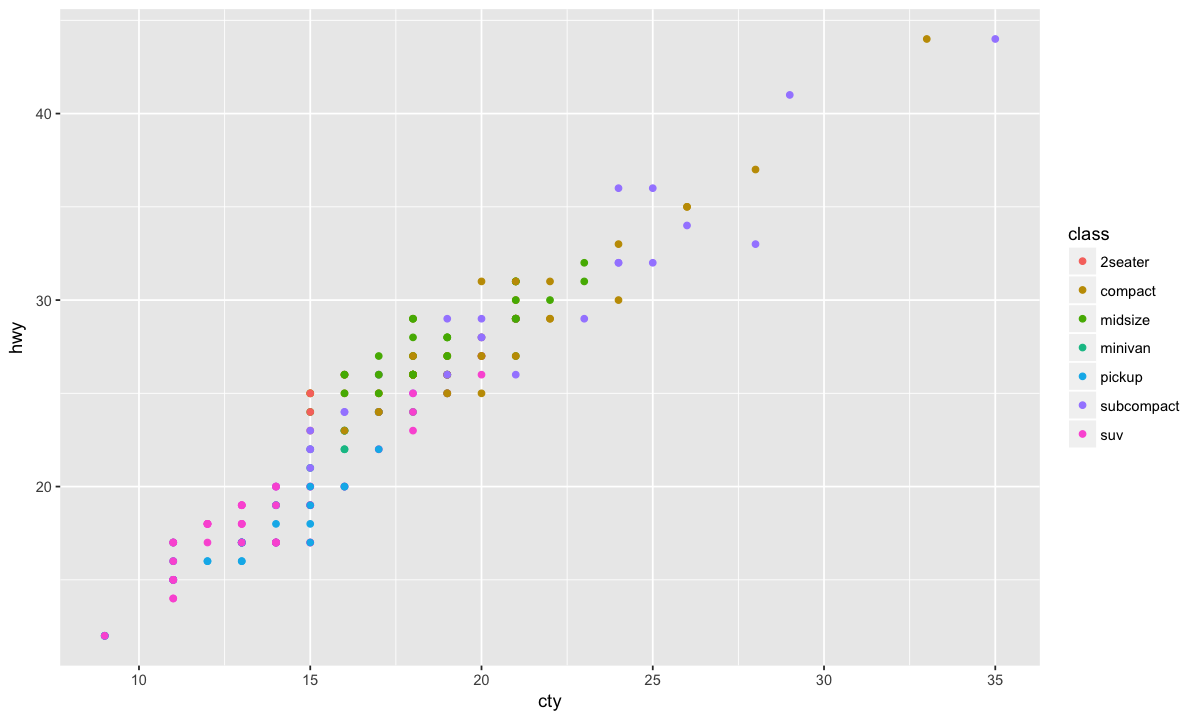

In [8]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = cty, y = hwy, color = class))

We see that compact and subcompact cars have the highest mileage whereas SUVs and pickup trucks have the lowest.

## Data Transformation
Let us load the `nycflights13` dataset that has information about all flights that departed New York area (airport codes JFK, EWR, LGA) in 2013.

In [9]:
library(nycflights13)  ## you may need to install.packages() this
print(flights)

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
# ... with 336,766 more row

We have information about 336,776 flights. Let us first get a smaller, more manageable dataset by looking at flights only in January.

In [10]:
jan_flights = filter(flights, month == 1)

Warning message:
“package ‘bindrcpp’ was built under R version 3.4.4”

Let us find flights that had a departure delay of more than 1 hour.

In [11]:
print(filter(jan_flights, dep_delay > 60))

# A tibble: 1,821 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      811            630       101     1047            830
 2  2013     1     1      826            715        71     1136           1045
 3  2013     1     1      848           1835       853     1001           1950
 4  2013     1     1      957            733       144     1056            853
 5  2013     1     1     1114            900       134     1447           1222
 6  2013     1     1     1120            944        96     1331           1213
 7  2013     1     1     1301           1150        71     1518           1345
 8  2013     1     1     1337           1220        77     1649           1531
 9  2013     1     1     1400           1250        70     1645           1502
10  2013     1     1     1505           1310       115     1638           1431
# ... with 1,811 more rows, a

Let us sort the January flights by departure delays, longest delays first.

In [12]:
print(arrange(jan_flights, desc(dep_delay)))

# A tibble: 27,004 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     9      641            900      1301     1242           1530
 2  2013     1    10     1121           1635      1126     1239           1810
 3  2013     1     1      848           1835       853     1001           1950
 4  2013     1    13     1809            810       599     2054           1042
 5  2013     1    16     1622            800       502     1911           1054
 6  2013     1    23     1551            753       478     1812           1006
 7  2013     1    10     1525            900       385     1713           1039
 8  2013     1     1     2343           1724       379      314           1938
 9  2013     1     2     2131           1512       379     2340           1741
10  2013     1     7     2021           1415       366     2332           1724
# ... with 26,994 more rows,

We see that the most delayed flight was delayed by 1301 minutes. That's more than 21 hours! We also see that the rows at the bottom all have `NA` as the value of the variable `dep_delay`. That's how **missing values** are represented in R.

Let us find out what were the average delays for different months. You will notice two new things below.

1. The assignment operator in R is traditionally written `<-`. Some people prefer to use the more standard `=`. Both work and which one you choose is a matter of personal preference.
2. Enclosing an assignment in round brackets causes the assignment to be made as well as printed. 

In [13]:
by_month <- group_by(flights, year, month)
(monthly_averages <- summarise(by_month, delay = mean(dep_delay, na.rm = TRUE)))

   year month delay    
1  2013  1    10.036665
2  2013  2    10.816843
3  2013  3    13.227076
4  2013  4    13.938038
5  2013  5    12.986859
6  2013  6    20.846332
7  2013  7    21.727787
8  2013  8    12.611040
9  2013  9     6.722476
10 2013 10     6.243988
11 2013 11     5.435362
12 2013 12    16.576688

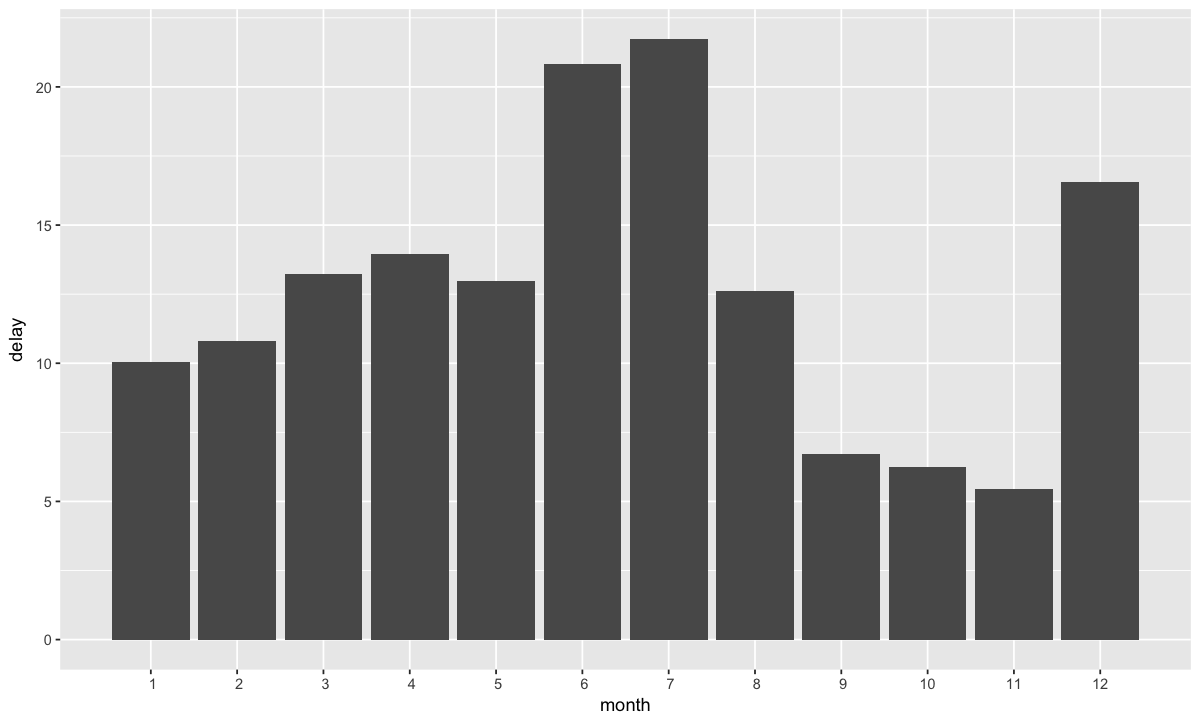

In [14]:
ggplot(data = monthly_averages) +
    geom_bar(mapping = aes(x = month, y = delay), stat = 'identity') +
    scale_x_discrete(limits = seq(1,12))

## Exploratory Data Analysis

Let us now look at `diamonds`, a dataset containing the prices and other information about almost 54,000 diamonds.

In [15]:
print(diamonds)

# A tibble: 53,940 x 10
   carat cut       color clarity depth table price     x     y     z
   <dbl> <ord>     <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1 0.23  Ideal     E     SI2      61.5    55   326  3.95  3.98  2.43
 2 0.21  Premium   E     SI1      59.8    61   326  3.89  3.84  2.31
 3 0.23  Good      E     VS1      56.9    65   327  4.05  4.07  2.31
 4 0.290 Premium   I     VS2      62.4    58   334  4.2   4.23  2.63
 5 0.31  Good      J     SI2      63.3    58   335  4.34  4.35  2.75
 6 0.24  Very Good J     VVS2     62.8    57   336  3.94  3.96  2.48
 7 0.24  Very Good I     VVS1     62.3    57   336  3.95  3.98  2.47
 8 0.26  Very Good H     SI1      61.9    55   337  4.07  4.11  2.53
 9 0.22  Fair      E     VS2      65.1    61   337  3.87  3.78  2.49
10 0.23  Very Good H     VS1      59.4    61   338  4     4.05  2.39
# ... with 53,930 more rows


Let us try to understand the relationship between the price of a diamond and its weight in carats.

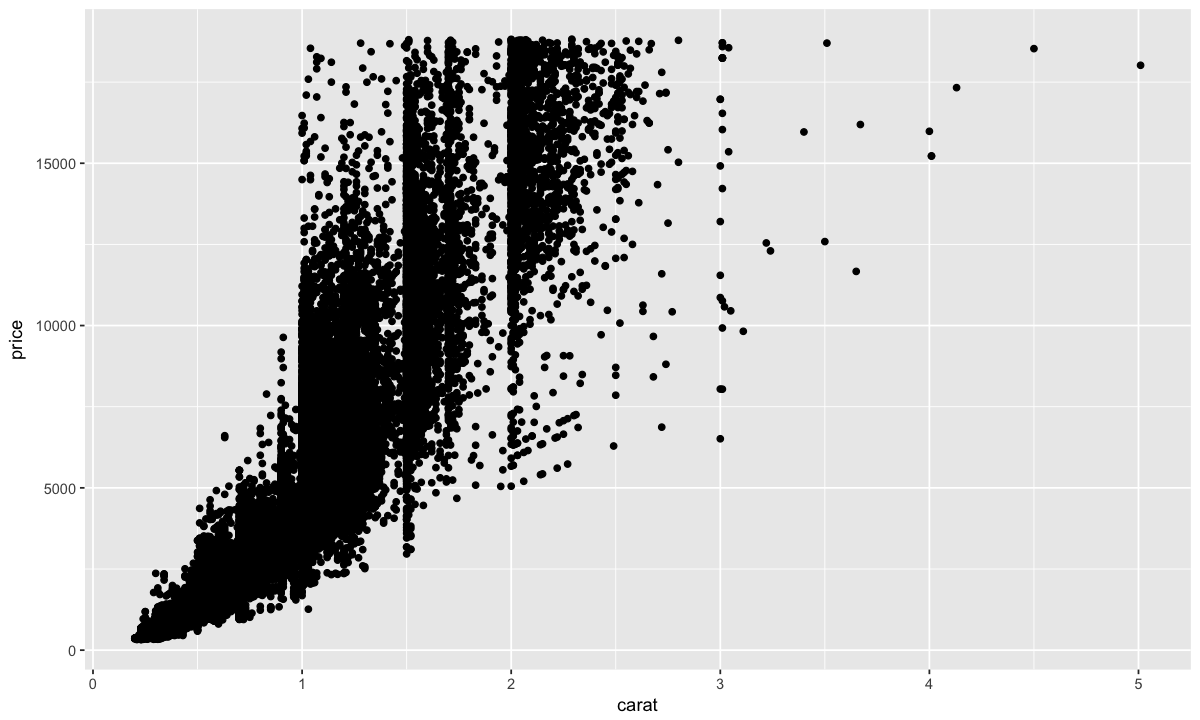

In [16]:
ggplot(data = diamonds) +
    geom_point(mapping = aes(x = carat, y = price))

This graphic suffers from *overplotting*: there are so many data points that they coalesce into a black blob, hindering interpretation. 

We can change the geometry to `bin2d` that creates rectangular regions and uses full color to show how many points landed in each bin.

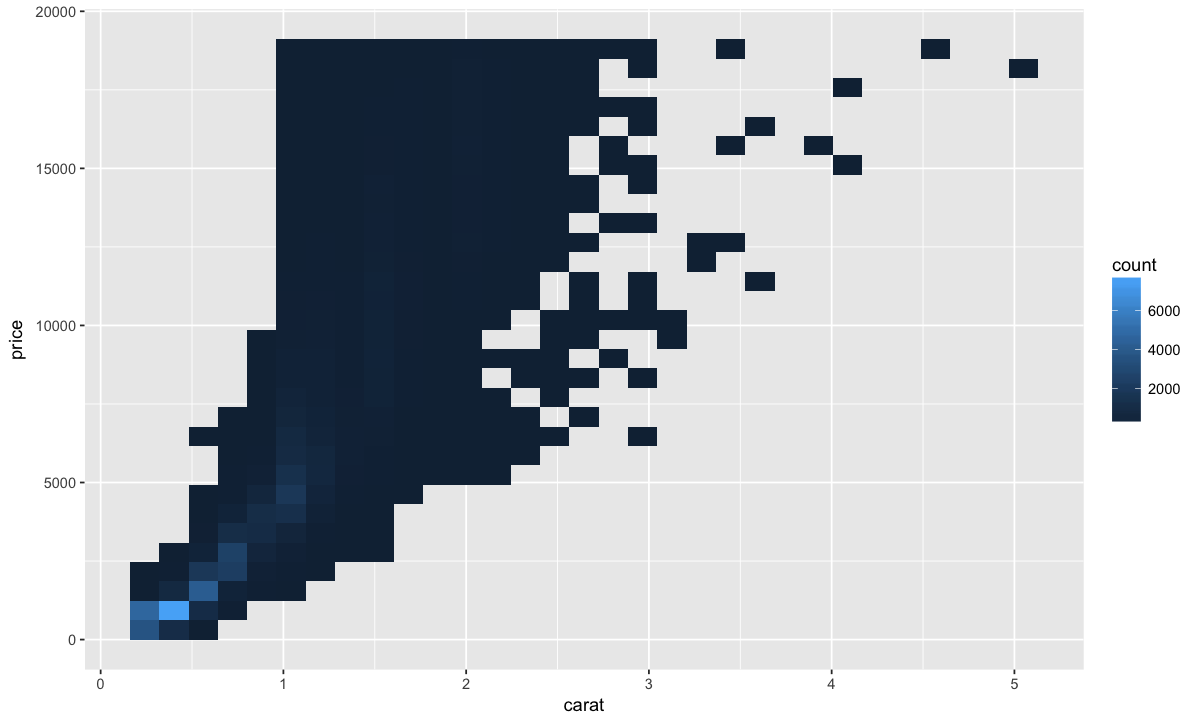

In [17]:
ggplot(data = diamonds) + 
  geom_bin2d(mapping = aes(x = carat, y = price))

We can also choose hexagonal bins.

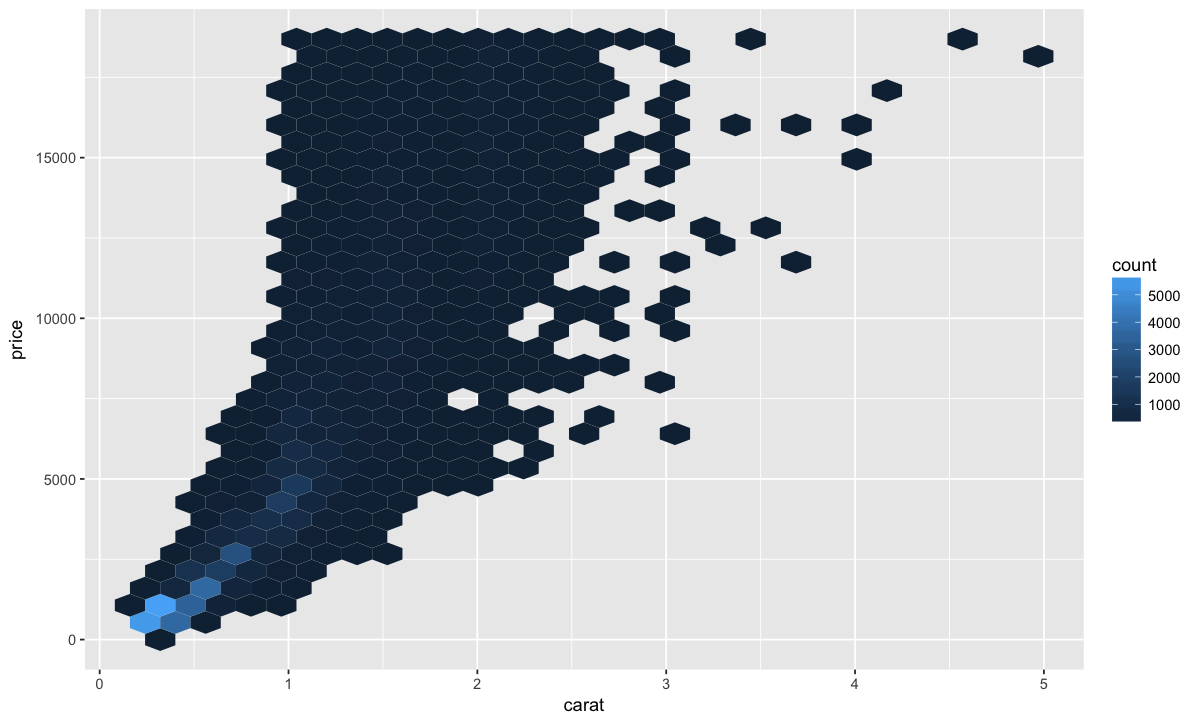

In [18]:
ggplot(data = diamonds) + 
  geom_hex(mapping = aes(x = carat, y = price))

We can also use `geom_smooth` to create a smooth plot of how price varies as a function of weight in carats. 

`geom_smooth()` using method = 'gam'


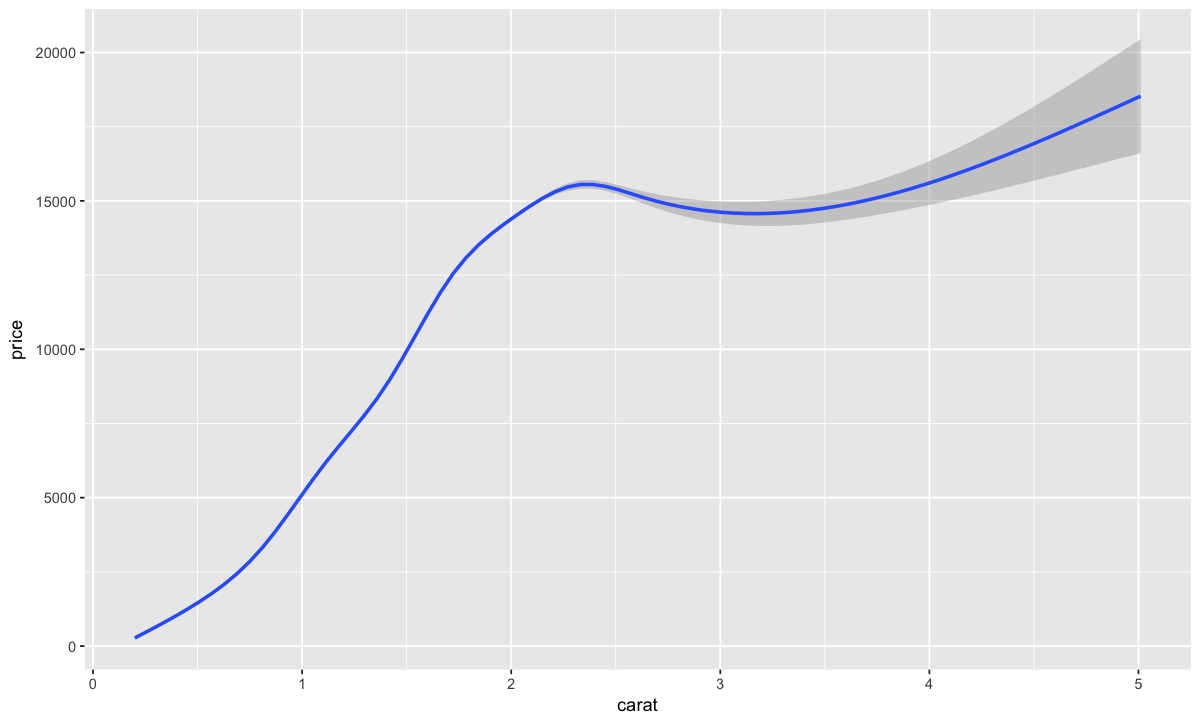

In [19]:
ggplot(data = diamonds) + 
  geom_smooth(mapping = aes(x = carat, y = price))

What about the relationship between `price` and `cut`? Since `cut` is a categorical variable, let us use a **boxplot** using the `geom_boxplot` geometry.

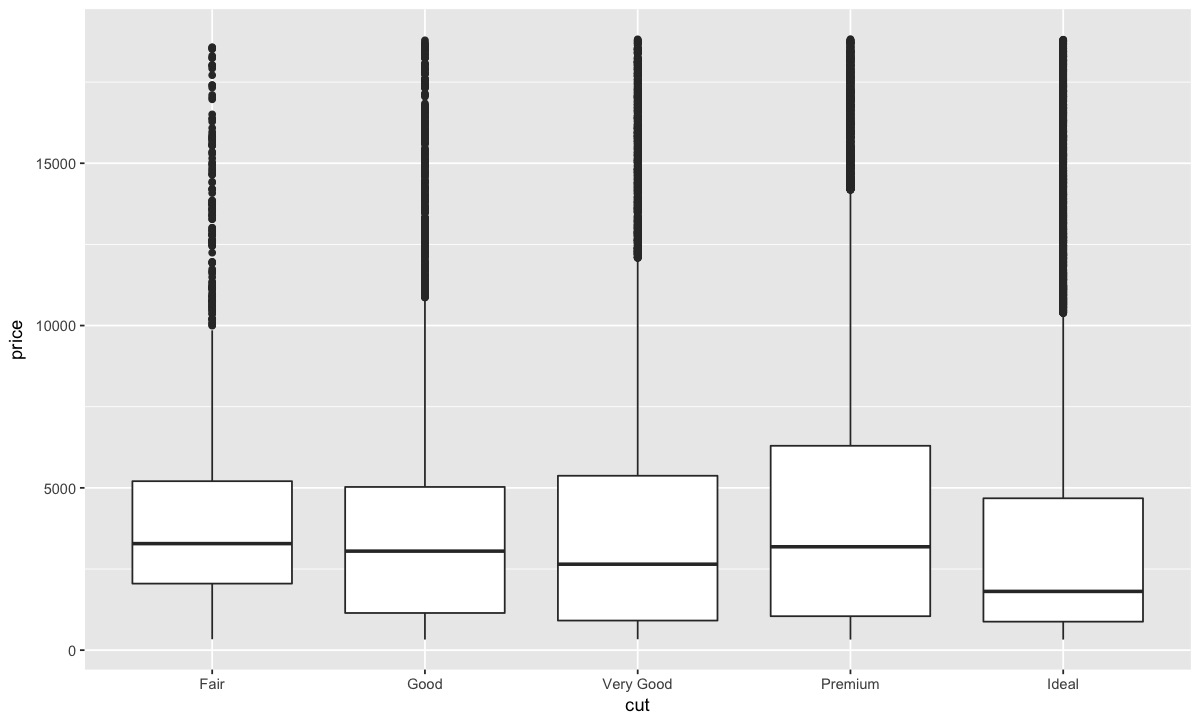

In [20]:
ggplot(data = diamonds) +
    geom_boxplot(mapping = aes(x = cut, y = price))

Hmmm. That looks strange. We might expect price to go up as the quality increases but here the lowest quality diamonds seems to be the most expensive! This is because fair quality diamonds are also larger and larger diamonds tend to be more expensive. Let's plot `carat` versus `cut`.

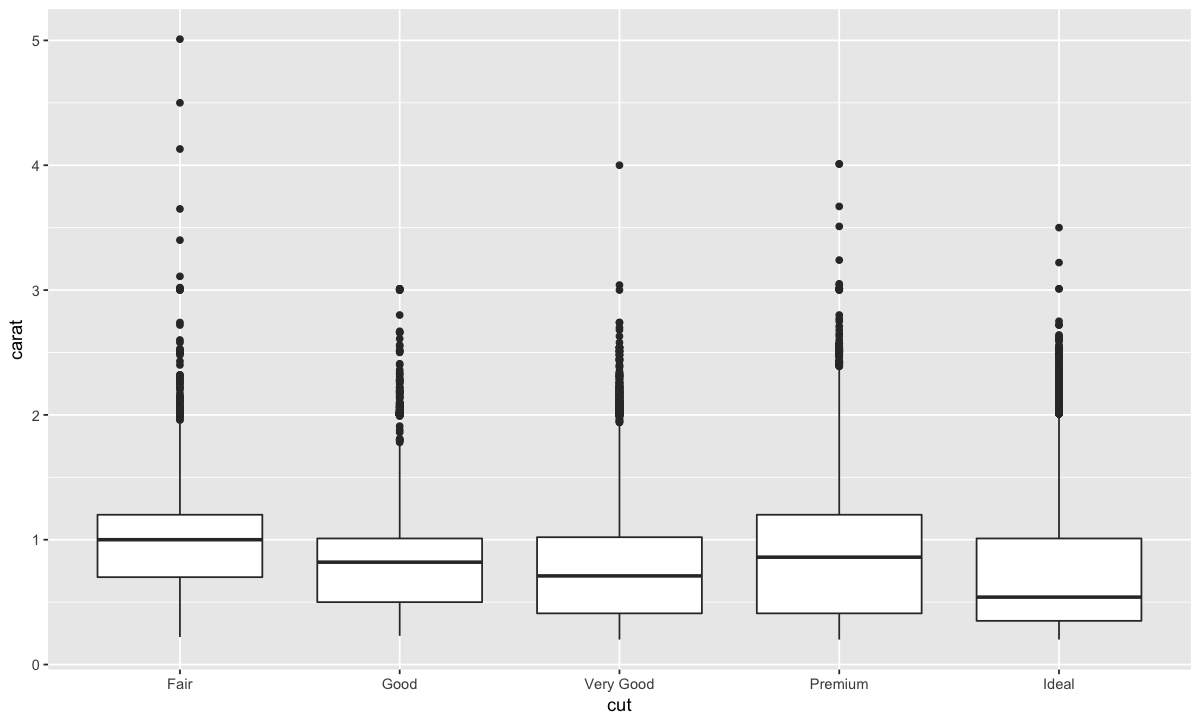

In [21]:
ggplot(data = diamonds) +
    geom_boxplot(mapping = aes(x = cut, y = carat))

As you can see, untangling the relationship between even just 3 variables can be hard. We haven't even looked at two other "C's" yet -- color and clarity!

## Strings

Strings are sequences of characters and store textual data. Many data sets contain strings which you will need to manipulate in order to extract useable data. We will use the `stringr` package to work with strings in R.

In [22]:
library(stringr)

All string manipulation functions in `stringr` start with `str_`. Here's how to compute the length of a string.

In [23]:
str_length("This is a string.")

[1] 17

`str_c` can be used to join, or **concatenate**, strings.

In [24]:
str_c("Birds of a feather","flock together.")

[1] "Birds of a featherflock together."

Oops, that didn't put a space in between. We can add it using the `sep` argument.

In [25]:
str_c("Birds of a feather","flock together.", sep=" ")

[1] "Birds of a feather flock together."

We can **sort** strings in alphabetic order.

In [26]:
data_science_languages = c("R", "Python", "Scala", "Julia")
str_sort(data_science_languages)

[1] "Julia"  "Python" "R"      "Scala" 

We can look for patterns in strings using `str_view`. For example, let us try to find a very simple pattern -- the letter "a" -- in the language names above.

In [27]:
str_view(data_science_languages, "a")

HTML widgets cannot be represented in plain text (need html)

`str_view` matches only the first occurence of a pattern. To match all occurrences, we can use `str_view_all`

In [28]:
str_view_all(data_science_languages, "a")

HTML widgets cannot be represented in plain text (need html)

To find a pattern only at the end of a strong, we can use the anchor "$" that matches the end of a string.

In [29]:
str_view(data_science_languages, "a$")

HTML widgets cannot be represented in plain text (need html)

If we only want to find out whether a pattern matches a string, we can use `str_detect`. The the code below `[aeiou]` is a group that matches any letter in the given group, in this case all 5 vowels in the English alphabet.

In [30]:
str_detect(data_science_languages, "[aeiou]")

[1] FALSE  TRUE  TRUE  TRUE

(Aside: ``[aeiou]`` is an example of a *regular expression*. We'll talk about these more later in the course.)

## Dates and Times

Dates are another common type of data that we will encounter The `lubridate` package helps us work with dates and times.

In [31]:
library(lubridate)

Warning message:
“package ‘lubridate’ was built under R version 3.4.4”
Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



Here's how to get today's date as a date object and the current time as a date-time object.

In [32]:
today()
now()

[1] "2018-09-03"

[1] "2018-09-03 12:16:02 EDT"

Let's convert the time data in the flights data set to a proper date-time representation. We'll use the ``select()`` and ``mutation()`` commands to pick out only the columns pertaining to time and create date-time objects. (Here we are using the pipe operator ``%>%`` which we will discuss later.)

In [33]:
flights_dt = flights %>% 
             select(year, month, day, hour, minute) %>% 
             mutate(departure = make_datetime(year, month, day, hour, minute))
print(flights_dt)

# A tibble: 336,776 x 6
    year month   day  hour minute departure          
   <int> <int> <int> <dbl>  <dbl> <dttm>             
 1  2013     1     1     5     15 2013-01-01 05:15:00
 2  2013     1     1     5     29 2013-01-01 05:29:00
 3  2013     1     1     5     40 2013-01-01 05:40:00
 4  2013     1     1     5     45 2013-01-01 05:45:00
 5  2013     1     1     6      0 2013-01-01 06:00:00
 6  2013     1     1     5     58 2013-01-01 05:58:00
 7  2013     1     1     6      0 2013-01-01 06:00:00
 8  2013     1     1     6      0 2013-01-01 06:00:00
 9  2013     1     1     6      0 2013-01-01 06:00:00
10  2013     1     1     6      0 2013-01-01 06:00:00
# ... with 336,766 more rows


We can now plot a histogram of flight counts by departure time. We will use a binwidth of a day.

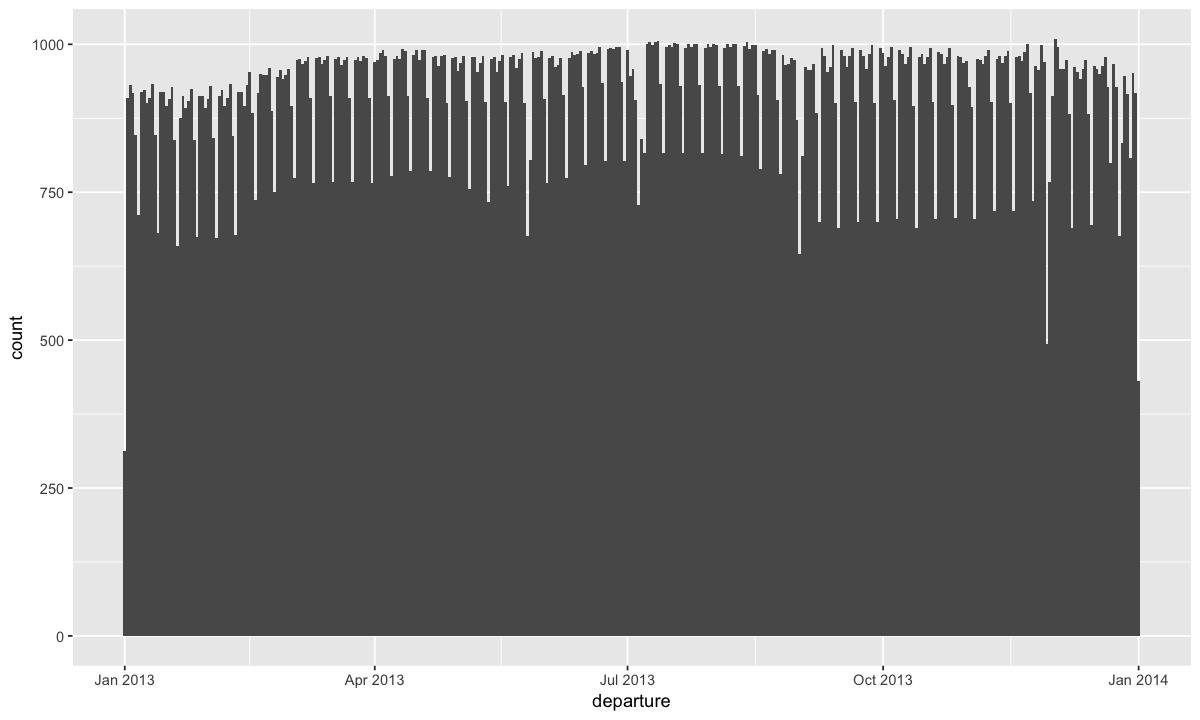

In [34]:
ggplot(data = flights_dt) +
  geom_histogram(mapping=aes(x = departure), binwidth=24*60*60)  # bin width for date-time is in seconds

What do those dips correspond to? Let us look more closely at data only from January.

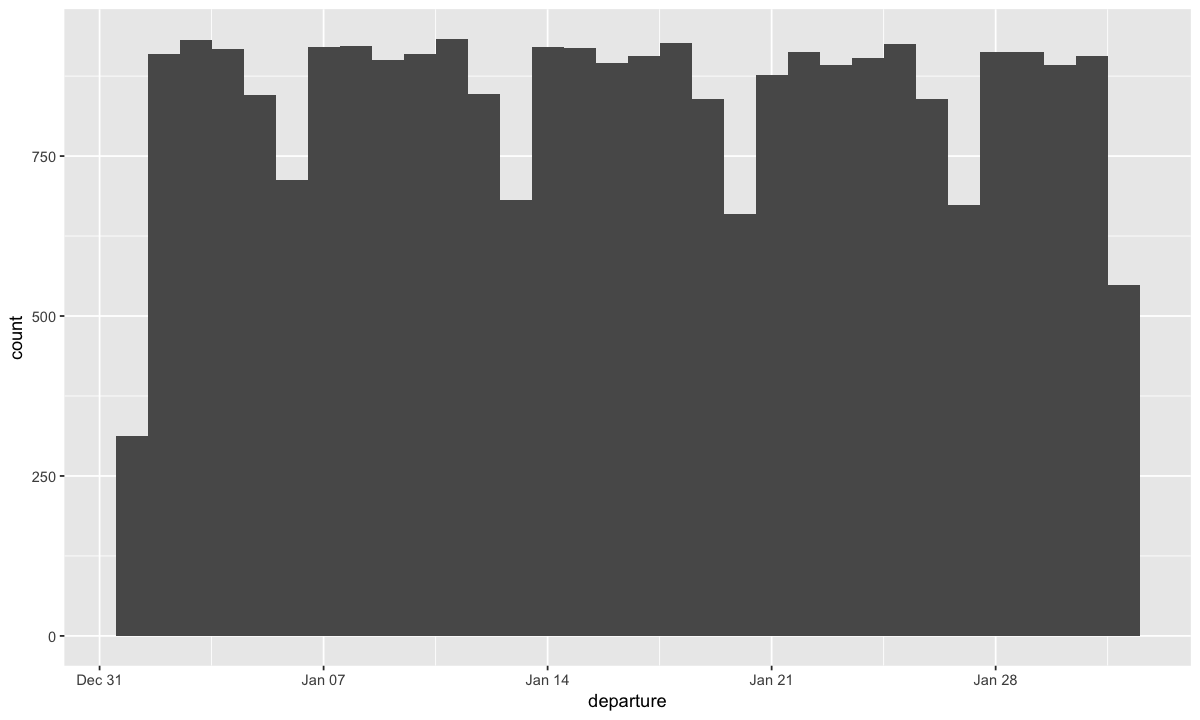

In [35]:
flights_dt_jan = filter(flights_dt, departure < ymd(20130201))
ggplot(data = flights_dt_jan) +
  geom_histogram(mapping=aes(x = departure), binwidth=24*60*60)  # bin width for date-time is in seconds

We see fewer flights on Jan 6, 13, 20, 27. These must be Sundays. Let us check.

In [36]:
wday(ymd(20130106), label=TRUE, abbr=FALSE)

[1] Sunday
7 Levels: Sunday < Monday < Tuesday < Wednesday < Thursday < ... < Saturday

## Functions

Functions are the most basic mechanism for code reuse. If you find yourself copying and pasting code more than twice, you probably want to think about writing a function. Then, later changes only need to be done in one place and not in all the many places where you copied your code.

In [37]:
say_hello <- function(x) {
    str_c("Hello ", x, "!")
}
say_hello("World")
say_hello("STATS 306")

[1] "Hello World!"

[1] "Hello STATS 306!"

`say_hello` is the **name** of our function. `x` is the **argument** to the function and the code between the curly brackets `{` and `}` is the **body** of the function.

Let's see what happens when we don't provide an argument.

In [38]:
say_hello()

ERROR: Error in str_c("Hello ", x, "!"): argument "x" is missing, with no default


We can supply the **default** value of argument as the code below shows.

In [ ]:
say_hello <- function(x = "there") {
    str_c("Hello ", x, "!")
}

If we supply the argument, the function works as before.

In [ ]:
say_hello('friends')

If we don't, it uses the default argument.

In [ ]:
say_hello()

Let's see what happens when we pass along the empty string "" as an argument to `say_hello`.

In [ ]:
say_hello("")

Perhaps, we don't like the space between "Hello" and "!" in this case. So we will add a check to see if the argument is an empty string.

In [ ]:
say_hello <- function(x = "there") {
    if (str_length(x) == 0) {
        "Hello!"
    } else {
        str_c("Hello ", x, "!")
    }
}
say_hello("")

We just saw an instance of **conditional execution** of code using the `if` statement.

## Vectors

R has two types of vectors:

**Atomic vectors**: These are homogeneous in the sense that every element is of the same type. For example, logical, integer, double, character.

**Lists**: These are heterogenous in the sense that different elements can be of different types. In particular, a list can contain another list.

In [ ]:
(my_lgl_vector <- 1:10 %% 2 == 1) # TRUE if odd, FALSE if even

Vectors are very useful in R. We can query their type, length, and apply mathematical operations across every element of the vector simultaneously:

In [ ]:
typeof(my_lgl_vector)

In [ ]:
length(my_lgl_vector)

In [ ]:
(my_dbl_vector <- 1:10 / 100)

In [ ]:
sqrt(my_dbl_vector)

What happens if we apply an identity operation?

In [ ]:
sqrt(my_dbl_vector) ^ 2 == my_dbl_vector

This does not do what we expect because of the inherent imprecision of dealing with floating point numbers in code. However, we can check that they two vectors are ``near()`` to each other to within a tiny error tolerance:

In [ ]:
near(sqrt(my_dbl_vector) ^ 2, my_dbl_vector)

## Iteration
**Iteration** is an important concept in programming. It refers to doing the same operations repeatedly. Let us consider the famous *Fibonacci sequence* whose $n$th term is defined as

$$ F(n+1) = F(n) + F(n-1) $$

starting with $F(1) = 0$ and $F(2) = 1$.

The code below computes the first 10 Fibonacci numbers using a **for loop**.

In [ ]:
previous = 0
current = 1
for (i in 1:10) {
    print(previous)
    new = current + previous
    previous = current
    current = new
}

What if we want to print all Fibonacci numbers less than 1000. We do not know how long that will take. To iterate a computation as long as some condition is true, we can use a **while loop**.

In [ ]:
previous = 0
current = 1
while (previous < 1000) {
    print(previous)
    new = current + previous
    previous = current
    current = new
}